In [77]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Exploratory Data Analysis

In [85]:
#import data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [15]:
# top 5 rows
print(df.head())

df.count()

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [5]:
# show data types
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [9]:
# Get the max and min age
print('maximum age: ',df['Age'].max())
print('minimum age: ',df['Age'].min())

maximum age:  70
minimum age:  10


In [16]:
# Get the types of Risk level
# There are 3 risk levels in the data
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [20]:
# show number of null or missing values in each columns
df.isnull().sum(axis=0)

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [80]:
# convert Categorical column to numeric, giving the 1, 2 or 3 value according to the risk leve
# 1 means high risk, 2 means mid risk, 3 means low risk

def convertToNumeric(x):
    if x == 'high risk':
        return 1
    elif x == 'mid risk':
        return 2
    else:
        return 3

df['RiskLevel'] = df['RiskLevel'].apply(lambda x: convertToNumeric(x))

- The correlation plot below shows that RiskLevel is not highly correlated with any of the other columns in the data which implies that none of the variables alone can be used to imply the Maternal Risk Level.
- SystolicBP has high correlation with DiastopicBP. We can consider dropping one of these columns as it might be redundant to keep two highly correlated features.
- Age, SystolicBP, DiastolicBP and BS have positive correlation with each other. This means that as Age increase blood pressure and blood sugar have a good chance to increase as well.
- BodyTemp and HeartRate has mostly negative or or close to negative correlation with all the other columns but **not highly negative**.


In [90]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [86]:
# Standardise the independent variables (all columns except Risk Level) 
# so that each column contributes equally to the analysis
df.iloc[:, :-1] = StandardScaler().fit_transform(df.iloc[:, :-1])

Now we will see the groups using PCA plot

- **PCA** is **Principal Component Analysis**:
It reduces the number of variables in a dataset while preserving as much information as possible.

In [41]:
from sklearn.decomposition import PCA
import seaborn as sns

In [87]:
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['RiskLevel'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [88]:
X = df[['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['RiskLevel'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [89]:
X = df[['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate']]
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['RiskLevel'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# Using ML to predict Risk Level

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [125]:
y = df['RiskLevel']
x = df.iloc[:, 0:-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [126]:
# LOGISTIC REGRESSION
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predictions = logmodel.predict(X_test)
print(classification_report(y_test,log_predictions))
print('Accuracy LR:',accuracy_score(y_test,log_predictions))

              precision    recall  f1-score   support

   high risk       0.71      0.81      0.76        27
    low risk       0.66      0.82      0.73        40
    mid risk       0.62      0.37      0.46        35

    accuracy                           0.67       102
   macro avg       0.66      0.67      0.65       102
weighted avg       0.66      0.67      0.65       102

Accuracy LR: 0.6666666666666666


In [127]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print('Accuracy RFC',accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.89      0.86        27
    low risk       0.86      0.62      0.72        40
    mid risk       0.70      0.89      0.78        35

    accuracy                           0.78       102
   macro avg       0.80      0.80      0.79       102
weighted avg       0.80      0.78      0.78       102

Accuracy RFC 0.7843137254901961


In [128]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))
print('SVM',accuracy_score(y_test,svm_pred))

              precision    recall  f1-score   support

   high risk       0.80      0.89      0.84        27
    low risk       0.67      0.88      0.76        40
    mid risk       0.80      0.46      0.58        35

    accuracy                           0.74       102
   macro avg       0.76      0.74      0.73       102
weighted avg       0.75      0.74      0.72       102

SVM 0.7352941176470589


In [129]:
# KNN
# use elbow method to find the best K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,150):
    print('runnin: ',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    print('KNN',accuracy_score(y_test,pred_i))

runnin:  1
KNN 0.8137254901960784
runnin:  2
KNN 0.7254901960784313
runnin:  3
KNN 0.6764705882352942
runnin:  4
KNN 0.6568627450980392
runnin:  5
KNN 0.6568627450980392
runnin:  6
KNN 0.6764705882352942
runnin:  7
KNN 0.6568627450980392
runnin:  8
KNN 0.6470588235294118
runnin:  9
KNN 0.6470588235294118
runnin:  10
KNN 0.6764705882352942
runnin:  11
KNN 0.6862745098039216
runnin:  12
KNN 0.6862745098039216
runnin:  13
KNN 0.6862745098039216
runnin:  14
KNN 0.6666666666666666
runnin:  15
KNN 0.6862745098039216
runnin:  16
KNN 0.7058823529411765
runnin:  17
KNN 0.7254901960784313
runnin:  18
KNN 0.7156862745098039
runnin:  19
KNN 0.696078431372549
runnin:  20
KNN 0.696078431372549
runnin:  21
KNN 0.7058823529411765
runnin:  22
KNN 0.7058823529411765
runnin:  23
KNN 0.6862745098039216
runnin:  24
KNN 0.7058823529411765
runnin:  25
KNN 0.7058823529411765
runnin:  26
KNN 0.7156862745098039
runnin:  27
KNN 0.7254901960784313
runnin:  28
KNN 0.7156862745098039
runnin:  29
KNN 0.7058823529411

When K is at 1 the error rate is the lowest, so we will pick value 1 as the best K


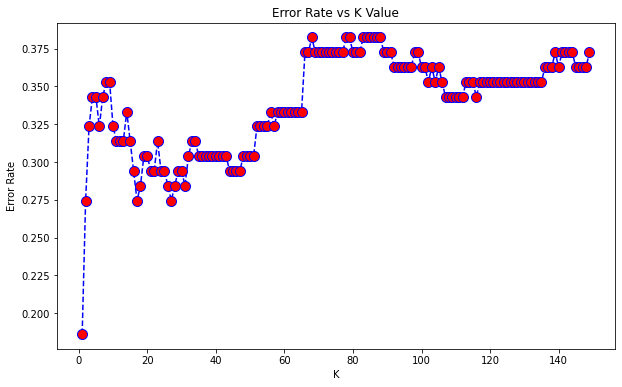

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150), error_rate, color='blue', linestyle = 'dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('When K is at 1 the error rate is the lowest, so we will pick value 1 as the best K')

In [144]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print('Accuracy KNN:',accuracy_score(y_test,knn_pred))

              precision    recall  f1-score   support

   high risk       0.77      0.85      0.81        27
    low risk       0.69      0.78      0.73        40
    mid risk       0.70      0.54      0.61        35

    accuracy                           0.72       102
   macro avg       0.72      0.72      0.72       102
weighted avg       0.71      0.72      0.71       102

Accuracy KNN: 0.7156862745098039


In [132]:
#grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,5,10,100,1000], 'gamma':[2,1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(probability=True),param_grid, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=2;, score=0.541 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=2;, score=0.497 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=2;, score=0.544 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=2;, score=0.549 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=2;, score=0.527 total time=   0.1s
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.683 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.678 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.687 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.648 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.654 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.601 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1

[CV 2/5] END ...................C=10, gamma=0.1;, score=0.727 total time=   0.1s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.720 total time=   0.1s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.692 total time=   0.1s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.692 total time=   0.1s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.694 total time=   0.1s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.689 total time=   0.1s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.687 total time=   0.1s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.665 total time=   0.1s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.659 total time=   0.1s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.590 total time=   0.1s
[CV 2/5] END .................C=10, gamma=0.001;, score=0.617 total time=   0.1s
[CV 3/5] END .................C=10, gamma=0.001;, score=0.621 total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 5, 10, 100, 1000],
                         'gamma': [2, 1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [142]:
# Use the best gamma and c value for svm after grid search
from sklearn.svm import SVC
svm = SVC( probability=True, gamma=2, C=1000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))
print('SVM',accuracy_score(y_test,svm_pred))

              precision    recall  f1-score   support

   high risk       0.73      0.89      0.80        27
    low risk       0.81      0.55      0.66        40
    mid risk       0.71      0.86      0.78        35

    accuracy                           0.75       102
   macro avg       0.75      0.77      0.75       102
weighted avg       0.76      0.75      0.74       102

SVM 0.7450980392156863


Dataset was split in train and test set in the ratio 9:1

Random Forest gave the highest accuracy of 78% accuracy on the test set.

Below we test Logistic Regression and Random forest with the same dataset except we don't use the column **DiastolicBP** to test since total explained variance without this column was highest in the PCA test

In [145]:
y = df['RiskLevel']
x = df[['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [146]:
# LOGISTIC REGRESSION
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predictions = logmodel.predict(X_test)
print(classification_report(y_test,log_predictions))
print('Accuracy LR:',accuracy_score(y_test,log_predictions))

              precision    recall  f1-score   support

   high risk       0.71      0.72      0.71        85
    low risk       0.59      0.91      0.72       128
    mid risk       0.52      0.22      0.31       122

    accuracy                           0.61       335
   macro avg       0.61      0.62      0.58       335
weighted avg       0.60      0.61      0.57       335

Accuracy LR: 0.6119402985074627


In [147]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print('Accuracy RFC',accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.92      0.87        85
    low risk       0.83      0.74      0.78       128
    mid risk       0.74      0.76      0.75       122

    accuracy                           0.79       335
   macro avg       0.80      0.81      0.80       335
weighted avg       0.79      0.79      0.79       335

Accuracy RFC 0.7940298507462686


Dropping the column DiastolicBP increased the accuracy on test set slightly by 1%.